In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


/home/ubuntu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv("malignant_signatures.csv")
df.index = df["Unnamed: 0"]
for x in (df.columns):
    print(x)


Unnamed: 0
orig.ident
nCount_RNA
nFeature_RNA
percent.mt
percent.rps
percent.rpl
percent.rp
predicted_doublets
doublet_scores
nCount_SCT
nFeature_SCT
SCT_snn_res.0.8
seurat_clusters
celltype_moused_main
celltype_moused_fine
ID
RNA_snn_res.0.5
lkb1.tumor_1
lkb1.immune_1
lkb1.tcells_1
celltypes_major_v1
celltypes_minor_v1
ID_major
integrated_snn_res.0.5
cellname
SpotID
AvAFM
Regulation.Of.Cell.Migration..GO.0030334.1
Positive.Regulation.Of.Cellular.Process..GO.0048522.1
Positive.Regulation.Of.Cell.Migration..GO.0030335.1
Positive.Regulation.Of.Blood.Vessel.Endothelial.Cell.Migration..GO.0043536.1
Regulation.Of.Cell.Population.Proliferation..GO.0042127.1
Positive.Regulation.Of.Endothelial.Cell.Migration..GO.0010595.1
Positive.Regulation.Of.Macromolecule.Metabolic.Process..GO.0010604.1
Positive.Regulation.Of.Cell.Population.Proliferation..GO.0008284.1
Positive.Regulation.Of.Protein.Serine.Threonine.Kinase.Activity..GO.0071902.1
Positive.Regulation.Of.Cell.Motility..GO.2000147.1
Positive.Re

In [5]:
Apical_Junction1 = [
    'Apical.Junction1',
    'Integrin.Mediated.Signaling.Pathway..GO.0007229.1',
    "Cell.Matrix.Adhesion..GO.0007160.1",

]

Angiogenesis1 = [
    "Angiogenesis1",
    "Coagulation1",
    "Positive.Regulation.Of.Angiogenesis..GO.0045766.1",
    "Regulation.Of.Blood.Vessel.Endothelial.Cell.Migration..GO.0043535.1",
    "Positive.Regulation.Of.Vasculature.Development..GO.1904018.1",
    
]


TGF_beta_Signaling1 = [
    'TGF.beta.Signaling1',
    'Positive.Regulation.Of.MAPK.Cascade..GO.0043410.1',
    "Positive.Regulation.Of.Intracellular.Signal.Transduction..GO.1902533.1",
]



Epithelial_Mesenchymal_Transition1 = [
    "Epithelial.Mesenchymal.Transition1",
    "Positive.Regulation.Of.Epithelial.To.Mesenchymal.Transition..GO.0010718.1",
    "Positive.Regulation.Of.Cell.Motility..GO.2000147.1",
]

Main_sigs = [

    'malig_signature_quart_pos_half_samp1',
    'malig_signature_quart_neg_quart_half_samp1',
  'Mechanosensitive_Signature1',
]
new_pathways = [Main_sigs, Apical_Junction1, 
                Angiogenesis1, 
                TGF_beta_Signaling1,
                Epithelial_Mesenchymal_Transition1
               ]

check_for_neg1 = [ 'AvAFM'
                 ]
all_pathways = new_pathways[0]
all_pathways.extend(new_pathways[1])
all_pathways.extend(new_pathways[2])
all_pathways.extend(new_pathways[3])
all_pathways.extend(new_pathways[4])
#all_pathways.extend(new_pathways[5])



all_pathways

all_pathways = list(all_pathways)

In [6]:
df[df['celltypes_minor_v1'] == "Malignant"]

Unnamed: 0 orig.ident  nCount_RNA  \
Unnamed: 0                                                                  
LAC12_GGACAGACAAGCGAGT-1  LAC12_GGACAGACAAGCGAGT-1      LAC12       24534   
LAC12_CGGACACAGTTGTCGT-1  LAC12_CGGACACAGTTGTCGT-1      LAC12       23513   
LAC12_AGTCTTTGTAGGGTAC-1  LAC12_AGTCTTTGTAGGGTAC-1      LAC12       23235   
LAC12_CAGCATAGTCTCGTTC-1  LAC12_CAGCATAGTCTCGTTC-1      LAC12       22469   
LAC12_GAACCTATCCGAACGC-1  LAC12_GAACCTATCCGAACGC-1      LAC12       22095   
...                                            ...        ...         ...   
LAC6_CCACCTAAGGGTCGAT-1    LAC6_CCACCTAAGGGTCGAT-1       LAC6         922   
LAC6_CGGAGCTGTACCGCTG-1    LAC6_CGGAGCTGTACCGCTG-1       LAC6         918   
LAC6_CTACACCTCTGACCTC-1    LAC6_CTACACCTCTGACCTC-1       LAC6         855   
LAC6_AAGACCTGTGATGCCC-1    LAC6_AAGACCTGTGATGCCC-1       LAC6         822   
LAC6_CACCTTGAGAATGTGT-1    LAC6_CACCTTGAGAATGTGT-1       LAC6         809   

                          nFeature_RNA  percent.mt  percent.rps  percent.rpl  \
Unnamed: 0                                                                     
LAC12_GGACAGACAAGCGAGT-1          5024           0            0            0   
LAC12_CGGACACAGTTGTCGT-1          5308           0            0            0   
LAC12_AGTCTTTGTAGGGTAC-1          5119           0            0            0   
LAC12_CAGCATAGTCTCGTTC-1          4945           0            0            0   
LAC12_GAACCTATCCGAACGC-1          4958           0            0            0   
...                                ...         ...          ...          ...   
LAC6_CCACCTAAGGGTCGAT-1            654           0            0            0   
LAC6_CGGAGCTGTACCGCTG-1            682           0            0            0   
LAC6_CTACACCTCTGACCTC-1            633           0            0            0   
LAC6_AAGACCTGTGATGCCC-1            573           0            0            0   
LAC6_CACCTTGAGAATGTGT-1            433           0            0            0   

                          percent.rp  predicted_doublets  doublet_scores  ...  \
Unnamed: 0                                                                ...   
LAC12_GGACAGACAAGCGAGT-1           0               False        0.030599  ...   
LAC12_CGGACACAGTTGTCGT-1           0               False        0.115249  ...   
LAC12_AGTCTTTGTAGGGTAC-1           0               False        0.107569  ...   
LAC12_CAGCATAGTCTCGTTC-1           0               False        0.054822  ...   
LAC12_GAACCTATCCGAACGC-1           0               False        0.047558  ...   
...                              ...                 ...             ...  ...   
LAC6_CCACCTAAGGGTCGAT-1            0               False        0.074592  ...   
LAC6_CGGAGCTGTACCGCTG-1            0               False        0.033518  ...   
LAC6_CTACACCTCTGACCTC-1            0               False        0.029999  ...   
LAC6_AAGACCTGTGATGCCC-1            0               False        0.064939  ...   
LAC6_CACCTTGAGAATGTGT-1            0               False        0.037508  ...   

                          Xenobiotic.Metabolism1  quartile  \
Unnamed: 0                                                   
LAC12_GGACAGACAAGCGAGT-1               -0.009203         4   
LAC12_CGGACACAGTTGTCGT-1               -0.015962         2   
LAC12_AGTCTTTGTAGGGTAC-1               -0.025285         3   
LAC12_CAGCATAGTCTCGTTC-1                0.005181         4   
LAC12_GAACCTATCCGAACGC-1               -0.026364         1   
...                                          ...       ...   
LAC6_CCACCTAAGGGTCGAT-1                -0.035762         4   
LAC6_CGGAGCTGTACCGCTG-1                 0.012846         3   
LAC6_CTACACCTCTGACCTC-1                -0.039566         3   
LAC6_AAGACCTGTGATGCCC-1                 0.059482         4   
LAC6_CACCTTGAGAATGTGT-1                 0.025867         4   

                          malig_signature_quart_pos1  \
Unnamed: 0                                             
LAC12_GGACAGACAAGCGAGT-1

In [7]:
from sklearn.preprocessing import StandardScaler

new_df = []

# Ensure the 'malig_integrated_signature_by_sample1' values are scaled
scaler = StandardScaler()

#df = df[df['celltypes_minor_v1'] == "Malignant"]
df['scaled_postive_afm_correlate_signature1'] = scaler.fit_transform(df[['malig_signature_quart_pos_half_samp1']])


n_clusters = 50  # You can adjust this number to be between 70-80
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model based on the 'avAFM' column
df['cluster_kmeans'] = kmeans.fit_predict(df[['scaled_postive_afm_correlate_signature1']])

for i,x in df.groupby('cluster_kmeans'):

    row = [i]
    for val in check_for_neg1:
        row.append(x[x[val] > 0][val].mean())
    for val in all_pathways:
        row.append(x[val].mean())
    new_df.append(row)
    
col_names = ['cluster']
col_names.extend(check_for_neg1)
col_names.extend(all_pathways)
cluster_df = pd.DataFrame(new_df, columns = col_names)
cluster_df = cluster_df.set_index('cluster')
cluster_df = cluster_df.sort_values(by=['malig_signature_quart_pos_half_samp1'], na_position='first')

cluster_df

AvAFM  malig_signature_quart_pos_half_samp1  \
cluster                                                      
28       1579.000708                             -0.635167   
13       1460.974268                             -0.499771   
44       1451.469795                             -0.468105   
23       1324.353793                             -0.437840   
7        1375.876677                             -0.395917   
47       1610.654481                             -0.371725   
19       1575.383612                             -0.349608   
37       1496.229257                             -0.329970   
3        1524.009483                             -0.305727   
22       1489.029513                             -0.287767   
33       1563.902656                             -0.269543   
26       1590.390408                             -0.248080   
6        1576.138295                             -0.227307   
17       1562.239208                             -0.208804   
21       1560.957987                             -0.188774   
46       1494.429133                             -0.173313   
9        1496.296855                             -0.162351   
48       1485.581902                             -0.151829   
29       1538.436833                             -0.141619   
49       1558.922520                             -0.130632   
1        1551.332718                             -0.118220   
34       1570.661821                             -0.105310   
43       1517.460133                             -0.091869   
24       1614.432257                             -0.076489   
10       1535.886516                             -0.062342   
31       1573.826852                             -0.043784   
16       1520.362145                             -0.026102   
41       1565.501763                             -0.009666   
4        1610.042125                              0.006066   
39       1668.666900                              0.022054   
15       1586.439625                              0.037250   
38       1556.163324                              0.054570   
8        1747.111027                              0.071402   
20       1491.473366                              0.089195   
35       1574.259236                              0.108073   
2        1763.559026                              0.127953   
40       1605.545520                              0.148225   
18       1556.077627                              0.171813   
42       1652.779180                              0.191790   
12       1584.191091                              0.211756   
27       1551.120182                              0.232038   
45       1663.893599                              0.252002   
5        1645.680978                              0.278689   
32       1837.002885                              0.309739   
11       1534.911381                              0.338123   
36       1714.169121                              0.364425   
25       1533.563140                              0.399809   
0        1626.768820                              0.442378   
14       1521.849452                              0.513272   
30       1412.589796                              0.563099   

         malig_signature_quart_neg_quart_half_samp1  \
cluster                                               
28                                         0.103039   
13                                         0.149364   
44                                         0.119503   
23                                         0.083275   
7                                          0.071512   
47                                         0.159891   
19                                         0.088033   
37                                         0.132674   
3                                          0.078691   
22                                         0.048696   
33                                         0.053717   
26                                         0.090914   
6                   

In [8]:
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
df_scaled = pd.DataFrame(scaler.fit_transform(cluster_df), columns=cluster_df.columns)



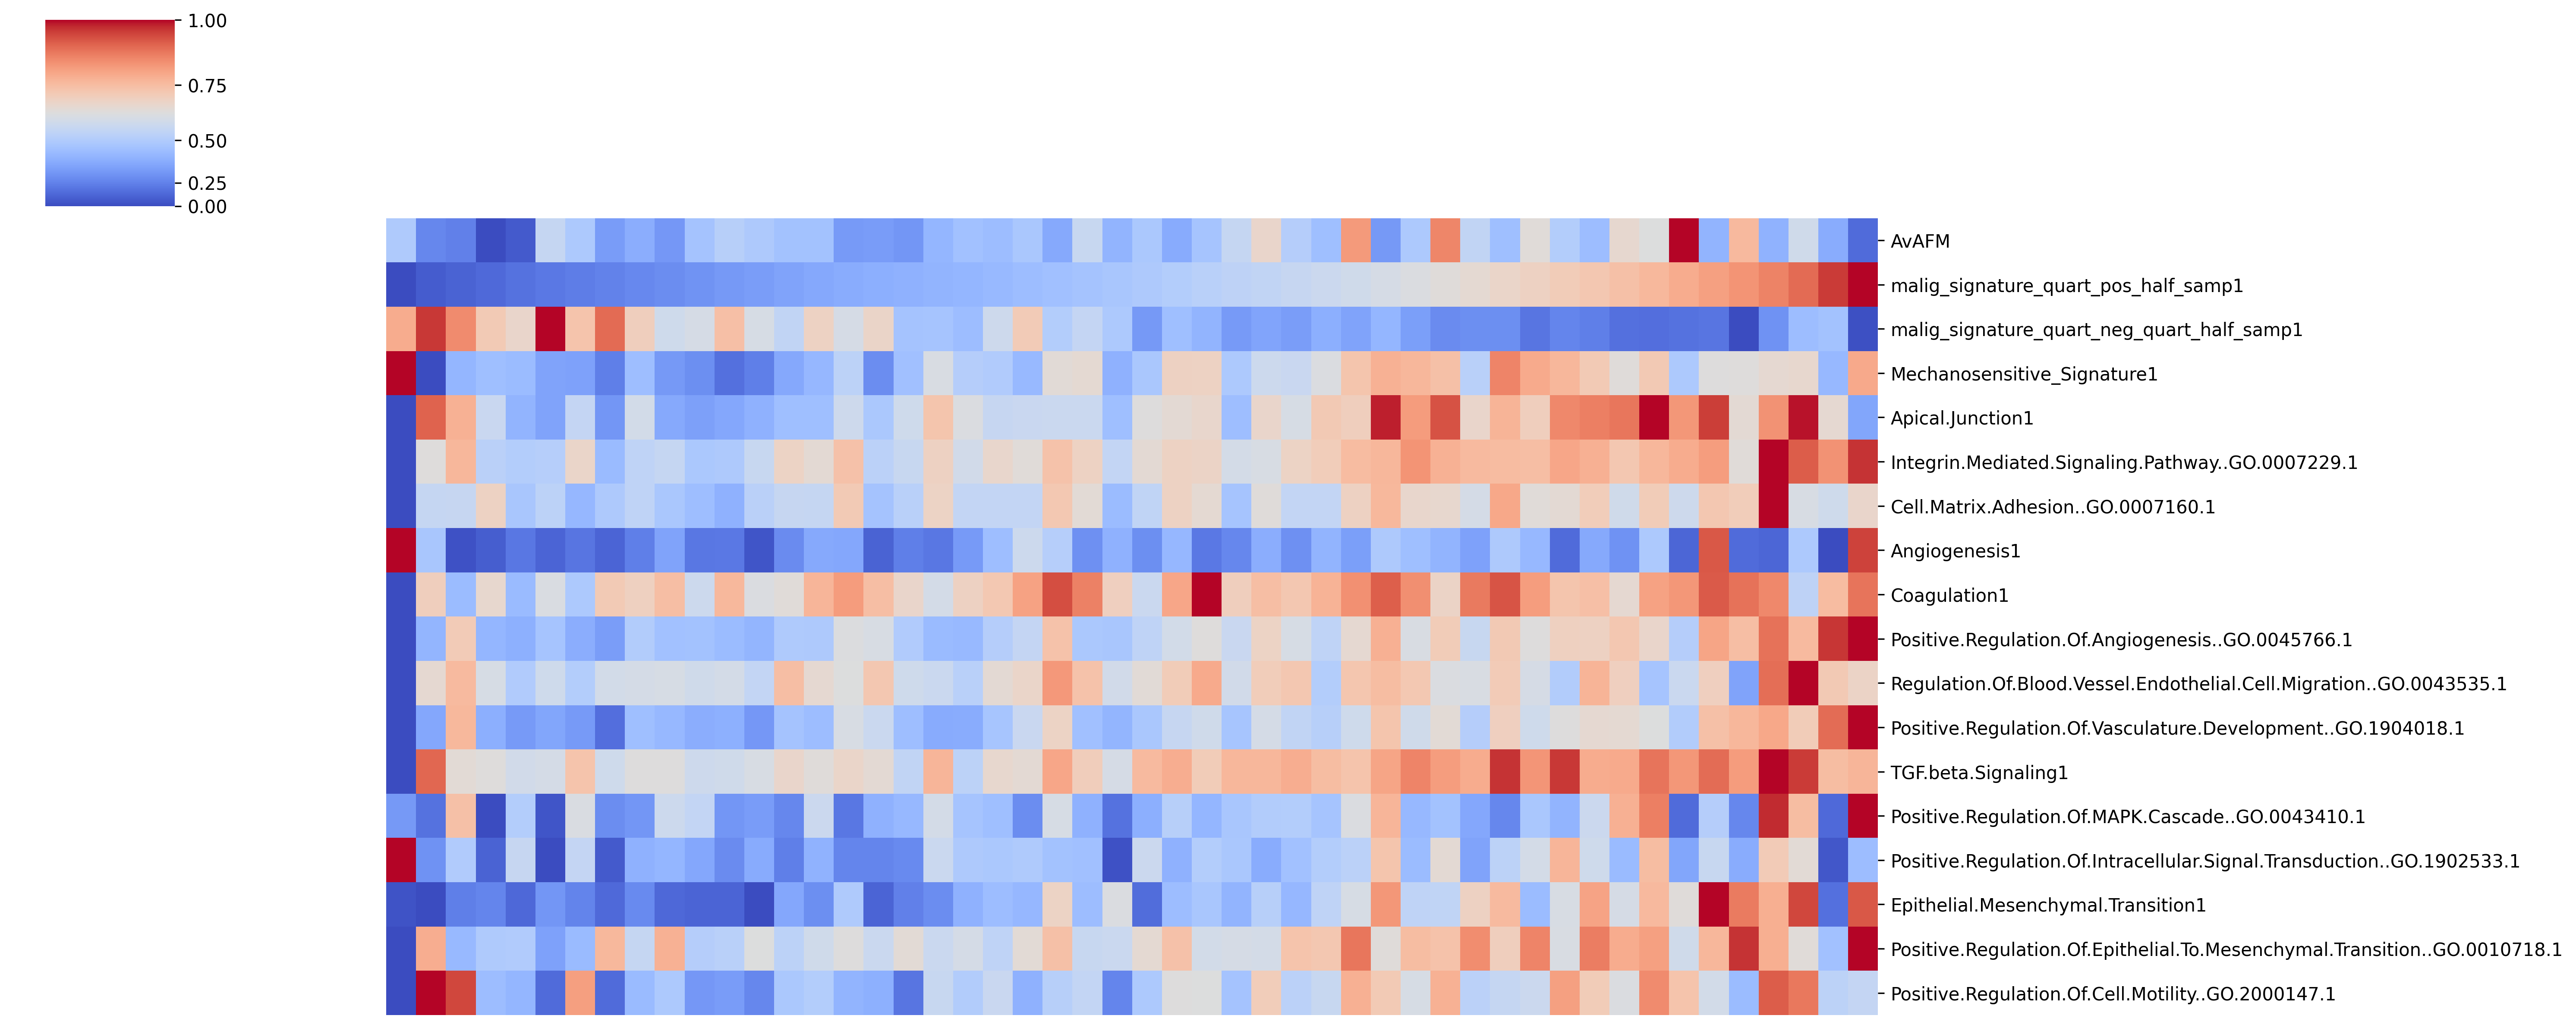

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm, LinearSegmentedColormap
from matplotlib.colors import LinearSegmentedColormap

# Update figure DPI for high resolution
plt.rcParams['figure.dpi'] = 300
# Assuming df_scaled is your dataframe with values scaled between 0 and 1

# Define a colormap (optional: to customize colors further) custom_cmap = LinearSegmentedColormap.from_list("custom_coolwarm", ["blue", "white", "red"])

# Apply a power normalization for better distribution
norm = PowerNorm(gamma=1.5)  # Gamma < 1 emphasizes lower values

# Plot the heatmap
plt.rcParams['figure.dpi'] = 300  # High resolution
sns.clustermap(
    df_scaled.T, 
    col_cluster=False, 
    row_cluster=False, 
    annot=False, 
    fmt=".1f", 
    cmap='coolwarm', 
    norm=norm,  # Apply normalization
    yticklabels=True, 
    xticklabels=False, 
    figsize=(20, 8)
)
plt.show()
